# Design Your Own Neural Net

In [1]:
import numpy as np
import matplotlib.pyplot as plt

logistic = lambda u: 1/(1+np.exp(-u))

(-2.79979654536898, 2.6299515043988433, -2.446617969795721, 2.464108016772752)

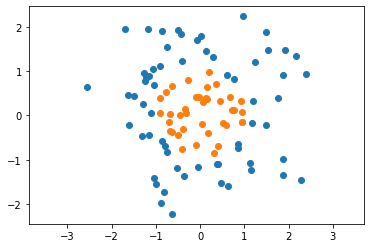

In [2]:
def get_challenge1():
    np.random.seed(0)
    X = np.random.randn(100, 2)
    d = np.sqrt(np.sum(X**2, axis=1))
    y = np.array(d < 1, dtype=float)
    return X, y

def get_challenge2():
    X, y = get_challenge1()
    X = np.concatenate((X+np.array([[-2, 0]]), X+np.array([[2, 0]])), axis=0)
    y = np.concatenate((y, y))
    return X, y


X, y = get_challenge1()
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.axis("equal")

In [3]:
def plot_net(X, y, mynet, res=100):
    rg = [np.min(X[:, 0]), np.max(X[:, 0])]
    dr = rg[1] - rg[0]
    pixx = np.linspace(rg[0], rg[1], res)
    rg = [np.min(X[:, 1]), np.max(X[:, 1])]
    dr = rg[1]- rg[0]
    pixy = np.linspace(rg[0], rg[1], res)
    xx, yy = np.meshgrid(pixx, pixy)
    I = mynet(xx, yy)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(I, cmap='gray', extent=(pixx[0], pixx[-1], pixy[-1], pixy[0]))
    plt.colorbar()
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='C0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='C1')
    plt.gca().invert_yaxis()
    plt.subplot(122)
    plt.imshow(I > 0.5, cmap='gray', extent=(pixx[0], pixx[-1], pixy[-1], pixy[0]))
    plt.colorbar()
    
    pred = mynet(X[:, 0], X[:, 1]) > 0.5
    plt.scatter(X[(y == 0)*(pred == 0), 0], X[(y == 0)*(pred == 0), 1], c='C0')
    plt.scatter(X[(y == 0)*(pred == 1), 0], X[(y == 0)*(pred == 1), 1], c='C0', marker='x')
    plt.scatter(X[(y == 1)*(pred == 0), 0], X[(y == 1)*(pred == 0), 1], c='C1', marker='x')
    plt.scatter(X[(y == 1)*(pred == 1), 0], X[(y == 1)*(pred == 1), 1], c='C1')
    plt.gca().invert_yaxis()
    num_correct = np.sum((y==0)*(pred==0)) + np.sum((y==1)*(pred==1))
    perc = 100*num_correct/X.shape[0]
    plt.title("{} Correct ({}%)".format(num_correct, perc))

<Figure size 432x288 with 0 Axes>

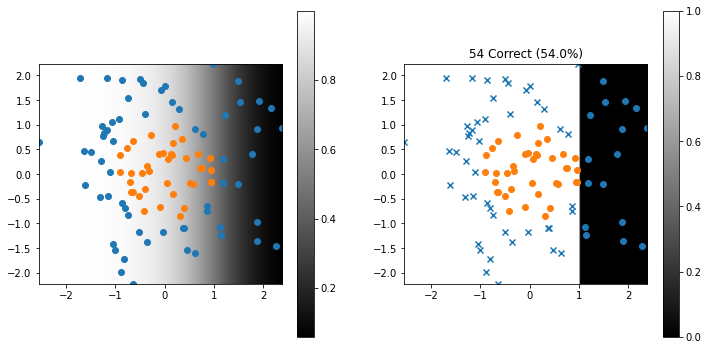

<Figure size 432x288 with 0 Axes>

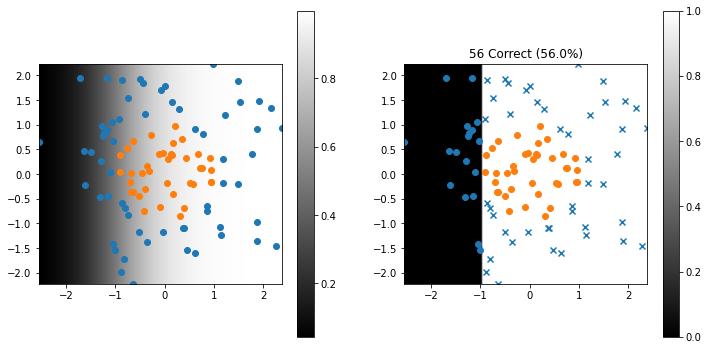

<Figure size 432x288 with 0 Axes>

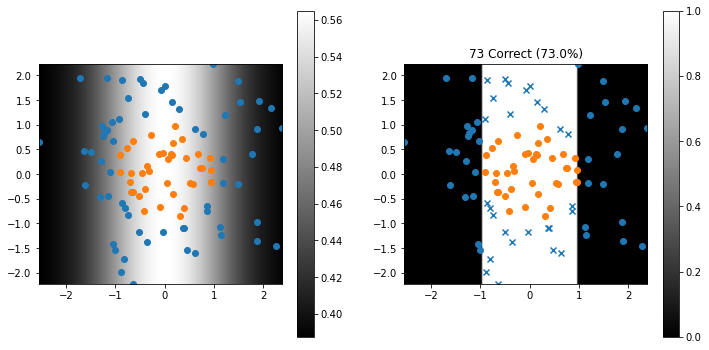

In [4]:
def fn1(x, y):
    return logistic(-2*x+2)

def fn2(x, y):
    return logistic(2*x+2)

def myfn(x, y):
    return logistic(fn1(x, y) + fn2(x, y) - 1.5)

plt.figure()
plot_net(X, y, fn1)
plt.figure()
plot_net(X, y, fn2)
plt.figure()
plot_net(X, y, myfn)